In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml ('mnist_784', version=1)

In [2]:
X,y=mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
some_digit = X.iloc[0]

In [4]:
#CLASSIFICATION


In [5]:
#DATA: MNIST: handwriting labelled
#Fetch Data

from sklearn.datasets import fetch_openml

mnist=fetch_openml ('mnist_784', version=1)

In [6]:

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:

X,y=mnist["data"], mnist["target"]
X.shape

# '# pictures=70000' and Features: 784
#image= 28 x 28 pixels 

(70000, 784)

In [8]:
y.shape
type(X)


pandas.core.frame.DataFrame

In [9]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Visualise one digit from X

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

In [11]:
#y label type is 'string'
import numpy as np

y=y.astype(np.uint8)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [12]:
#TEST_TRAIN split

#MNIST already split first 60k is train

X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
#Classify just one Digit-5

#BINARY CLASSIFIER

y_train_5= (y_train==5)
y_test_5= (y_test==5)

In [14]:
#type(some_digit.values)

In [15]:
X_train.shape
some_digit=some_digit.reshape(1,784)

In [16]:
#CLASSIFIER: STOCHASTIC GRADIENT DESCENT (SGD)

from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict(some_digit)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [18]:
#sgd_clf.predict([X[1]])

In [19]:
#CROSS-Validation
#SAME as scikit-learn's "cross_val_score()"

# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds= StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train,y_train_5):
#     clone_clf=clone(sgd_clf)
#     X_train_folds=X_train[train_index]
#     y_train_folds=y_train_5[train_index]
#     X_test_fold=X_train[test_index]
#     y_test_fold=y_train_5[test_index]
    
#     clone_clf.fit(X_train_folds,y_train_folds)
#     y_pred=clone_clf.predict(X_test_fold)
#     n_correct =sum(y_pred == y_test_fold)
#     print(n_correct/len(y_pred))

In [20]:
#CROSS-Validation: cross_val_score()

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#Depending only on accuracy is NOT good enough. 

array([0.95035, 0.96035, 0.9604 ])

In [21]:
#classifier which classifies Number that is NOT 5

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier ()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [23]:
#CONFUSION MATRIX

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

#Here, 
#A1= True negatives: 52892 non-5 correct classified as non-5
#B1= False positive(FP): 686  non-5 classified as 5

#A2= False Negative(FN): 1891 5 classified as non-5
#B2= True Positives(TP): 3530 5 classified as 5

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
#PRECISION= TP / (TP+FP)

y_train_perfect_predictions= y_train_5
confusion_matrix(y_train_5, y_train_5)

from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [25]:
#RECALL= TP / (TP+FN)

from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [26]:
#F score: harmonic mean of recall and precision

#F=2/((1/precision)+(1/recall))

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [27]:
#TRADE-OFF between precision and recall- DECISION FUNCTION
y_scores= sgd_clf.decision_function(some_digit)
#y_scores

threshold=0
y_some_digit_pred= (y_scores > threshold)
y_some_digit_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [28]:
threshold=80000
y_some_digit_pred= (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
#CROSS VAL PREDICT to get values of DECISION FUNCTION

y_scores= cross_val_predict(sgd_clf,X_train, y_train_5, cv=3, method="decision_function")


In [30]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

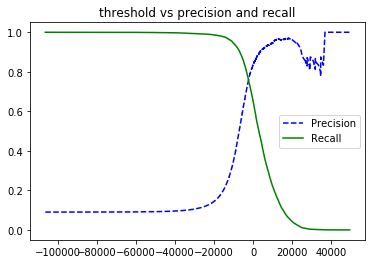

No handles with labels found to put in legend.


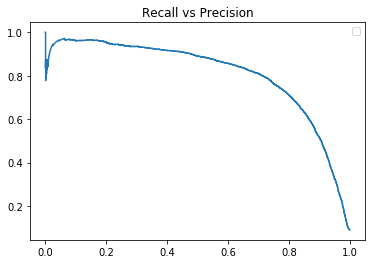

In [31]:
#Precision recall Curve

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.title("threshold vs precision and recall")
    plt.legend()
    
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

plt.plot(recalls, precisions)
plt.title("Recall vs Precision")
plt.legend()
plt.show()

In [32]:
type(precisions)
threshold_90_precision=thresholds[np.argmax(precisions>= 0.90)]

y_train_pred_90=(y_scores >= threshold_90_precision)

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

No handles with labels found to put in legend.


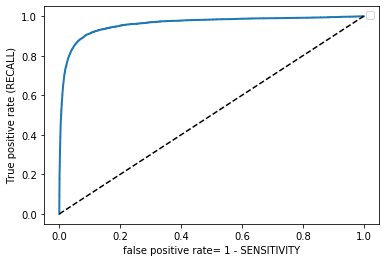

In [34]:
#ROC Curve 

from sklearn.metrics import roc_curve
fpr,tpr, thresholds= roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot ([0,1],[0,1],"k--")   #dashed diagonal
    plt.xlabel("false positive rate= 1 - SENSITIVITY")
    plt.ylabel("True positive rate (RECALL)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [35]:
#ROC AUC 

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [36]:
#RAMDON FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier (random_state=42)
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5,cv=3, method="predict_proba")

In [37]:
#RANDOM forest gie probabilites and NOT decision_functions

y_scores_forest= y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5, y_scores_forest)

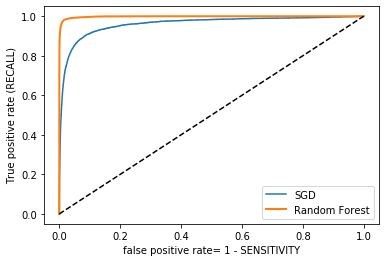

In [38]:
#plot ROC
plt.plot(fpr,tpr,label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [39]:
#ROC for Forest

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [42]:
#SVM & logistic regression strictly BINARY

from sklearn.svm import SVC

svm_clf=SVC()
svm_clf.fit(X_train,y_train)


AttributeError: 'SVC' object has no attribute 'predcit'

In [56]:
np.ndim(some_digit)
some_digit= np.ravel(some_digit).reshape(1,-1)
np.ndim(some_digit)
np.shape(some_digit)

(1, 784)

In [57]:
svm_clf.predict(some_digit)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=uint8)

In [61]:
some_digit= np.ravel(some_digit).reshape(1,-1)
some_digit_scores= svm_clf.decision_function(some_digit)
some_digit_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [64]:
np.argmax(some_digit_scores)
svm_clf.classes_[5]


5

In [67]:
#ONEvsREST classifier

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)


OneVsRestClassifier(estimator=SVC())

In [69]:
ovr_clf.predict(some_digit)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/

array([5], dtype=uint8)

In [70]:
len(ovr_clf.estimators_)

10

In [71]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [72]:
sgd_clf.predict(some_digit)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=uint8)

In [74]:
sgd_clf.decision_function(some_digit)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [75]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [77]:

cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [78]:
#confusion matrix
y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [80]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

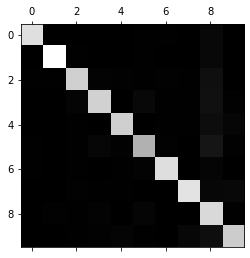

In [81]:
#plot of CONFUSION MATRIX

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


In [82]:
row_sums= conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx/ row_sums

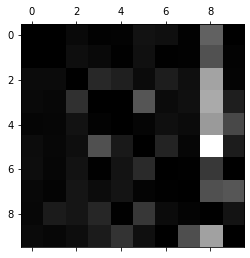

In [83]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [97]:
#from above matrix, you see that 3 and 5 are often mispredicted

cl_a, cl_b= 3, 5
X_aa= X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab= X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba= X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb= X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

X_aa.shape


(5227, 784)

In [95]:
def plot_digits(digits):
    # Calculate the number of rows needed
    #n_rows = (len(digits) - 1) // images_per_row + 1
    # Create a grid of subplots
    #fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row, n_rows))
    # Plot each digit image in a subplot
    for i in enumerate(digits):
        if i < len(digits):
            i.imshow(digits[i].reshape(28, 28), cmap='binary', interpolation='nearest')
            i.axis('off')
    plt.show()

KeyError: 0

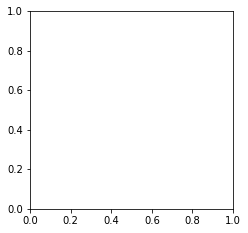

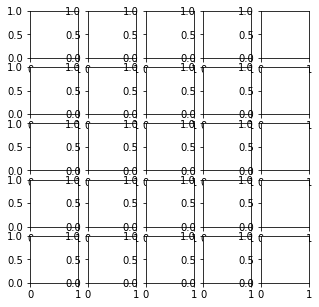

In [96]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(225); plot_digits(X_bb[:25], images_per_row=5)


In [100]:
#MULTI_LABEL CLASSIFICATION

from sklearn.neighbors import KNeighborsClassifier

y_train_large= (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel= np.c_[y_train_large, y_train_odd]


In [101]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

In [103]:
knn_clf.predict(some_digit)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[False,  True]])

In [104]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)


In [106]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [107]:
#Multioutput classifier 
#remove noise of the image

noise=np.random.randint(0,100,(len(X_train), 784))
X_train_mod= X_train + noise

noise= np.random.randint(0,100,(len(X_test), 784))
X_test_mod= X_test + noise

y_train_mod= X_train
y_test_mod= X_test

In [108]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit= knn_clf.predict([X_test_mod[some_digit]])
plot_digit(clean_digit)

KeyError: "None of [Index([(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)], dtype='object')] are in the [columns]"